## Part a)

Write a function which sets up a one-qubit basis and apply the various
Pauli matrices to these basis states. 
 Apply the Hadamard and Phase
gates to the same one-qubit basis states and study their actions on
these states. 

In [2]:

import numpy as np


# set up one qubit basis
b0 = np.array([1,0])
b1 = np.array([0,1])

# define pauli matrices and Hadamard and phase gates
sx = np.matrix([[0,1],[1,0]])
sy = np.matrix([[0,-1j],[1j,0]])
sz = np.matrix([[1,0],[0,1]])
I = np.identity(2)
Hadamard = 1/np.sqrt(2) * np.matrix([[1,1],[1,-1]])
def phase(angle):
    return np.matrix([[1,0],[0,np.exp(1j * angle)]])

print(sx,sy,sz,Hadamard, phase(np.pi))
# Apply Hadamard and Phase gates to the same one-qubit states

print("Hadamard times b0: ", np.matmul(Hadamard, b0))
print("Phase times b0: ", np.matmul(phase(np.pi), b0))



[[0 1]
 [1 0]] [[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]] [[1 0]
 [0 1]] [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]] [[ 1.+0.0000000e+00j  0.+0.0000000e+00j]
 [ 0.+0.0000000e+00j -1.+1.2246468e-16j]]
Hadamard times b0:  [[0.70710678 0.70710678]]
Phase times b0:  [[1.+0.j 0.+0.j]]


Define also Bell states and write a code where you
implement a Hadamard gate and thereafter a **CNOT** gate on one of the Bell
states of your choice. Perform thereafter a measurement on the first qubit and
thereafter on the second qubit. The measurements should be performed 
several times and it is the average results of these measurements
which should be discussed and presented.

Compare your code with the results obtained using **Qiskit** from the lectures of week 5.

In [3]:
# define Bell states

phiPlus = 1/np.sqrt(2) * (np.kron(b0,b0) + np.kron(b1,b1))
phiMinus = 1/np.sqrt(2) * (np.kron(b0,b0) - np.kron(b1,b1))
psiPlus = 1/np.sqrt(2) * (np.kron(b0,b1) + np.kron(b1,b0))
psiMinus = 1/np.sqrt(2) * (np.kron(b0,b1) - np.kron(b1,b0))
bellStates = np.array([phiPlus, phiMinus, psiPlus, psiMinus])
print("All Bell States")
print(bellStates)


# define 4D Hadamard and CNOT
Hadamard4D = np.kron(Hadamard, Hadamard)
CNOT = np.matrix([[1,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0]])
CNOT = np.kron(I, np.matrix([[1,0],[0,0]])) + np.kron(sx, np.matrix([[0,0],[0,1]]))
print("Hadamard 4D: ")
print(Hadamard4D)
print("CNOT: ")
print(CNOT)

# Apply first Hadamard4D on Bellstates and then CNOT on bell states

# Apply hadamard
product = np.matmul(Hadamard4D,bellStates[0])
product = np.matmul(CNOT,product.T)
print("Applied Hadamard and CNOT to bellState 0")
print(product)


All Bell States
[[ 0.70710678  0.          0.          0.70710678]
 [ 0.70710678  0.          0.         -0.70710678]
 [ 0.          0.70710678  0.70710678  0.        ]
 [ 0.          0.70710678 -0.70710678  0.        ]]
Hadamard 4D: 
[[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]]
CNOT: 
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
Applied Hadamard and CNOT to bellState 0
[[0.70710678]
 [0.70710678]
 [0.        ]
 [0.        ]]


In [8]:

# perform measurements: We want to know in what state our qubits are with what propability.
# starting with the first qubit we take the scalar product of state (00 + 01) with our state. This
# gives us the propability of our first qubit being in state 0. (10 + 11) times state gives us the propability
# for our first qubit being in state 1

# first qubit propability for being in state 0 and 1
print("propability for first qubit in state 0:", np.matmul(1/np.sqrt(2)*np.array([1,1,0,0]), product))
print("propability for first qubit in state 1:", np.matmul(1/np.sqrt(2)*np.array([0,0,1,1]), product))
# second qubit
print("propability for first qubit in state 0:", np.matmul(1/np.sqrt(2)*np.array([1,0,1,0]), product))
print("propability for first qubit in state 1:", np.matmul(1/np.sqrt(2)*np.array([0,1,0,1]), product))



propability for first qubit in state 0: [[1.]]
propability for first qubit in state 1: [[0.]]
propability for first qubit in state 0: [[0.5]]
propability for first qubit in state 1: [[0.5]]


# Comparison with qiskit

In [32]:
import qiskit as qk
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import numpy as np
from qiskit import transpile

# initialize constants for quantum circuit
nqubits = 1
ncbits = 1
qreg = qk.QuantumRegister(nqubits)
creg = qk.ClassicalRegister(ncbits)

# create circuit, apply gate and draw the circuit (you sadly can't draw multiple circuits, so just change the gate for each gate you want to analyze)
c = qk.QuantumCircuit(qreg,creg)
c.x(qreg[0])
c.measure(qreg[0], creg[0])
c.draw()

┌───┐┌─┐
q142: ┤ X ├┤M├
      └───┘└╥┘
c8: 1/══════╩═
            0

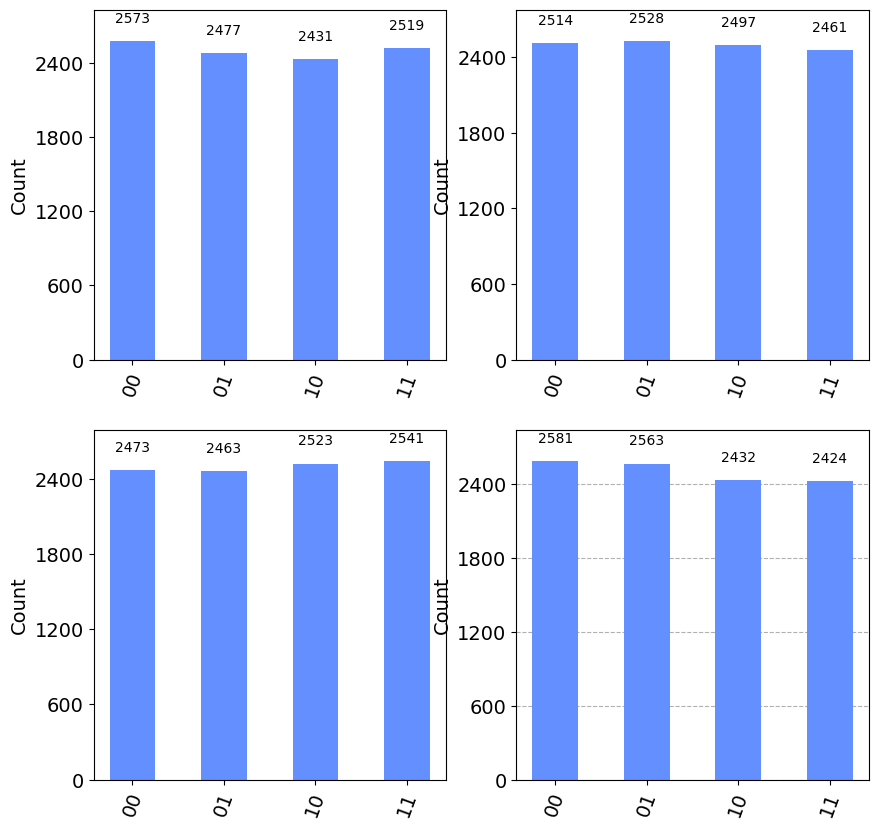

In [101]:
# initalize Bell states
phi_plus = QuantumCircuit(2,2)
phi_plus.h(0)
phi_plus.cx(0,1)
phi_plus.measure([0,1],[0,1])

phi_minus = QuantumCircuit(2,2)
phi_minus.h(0)
phi_minus.cx(0,1)
phi_minus.z(0) # you can flip 1 in this case too, but not both obviously
phi_minus.measure([0,1],[0,1])

psi_plus = QuantumCircuit(2,2)
psi_plus.h(0)
psi_plus.cx(0,1)
psi_plus.x(0) 
psi_plus.measure([0,1],[0,1])

psi_minus = QuantumCircuit(2,2)
psi_minus.h(0)
psi_minus.cx(0,1)
psi_minus.x(0)
psi_minus.z(0)
psi_minus.measure([0,1],[0,1])

bell_states = [phi_plus, phi_minus, psi_plus, psi_minus]


# apply Hadamard and CNOT to every Bell state
for i in range(0,4):
    # Apply gates
    bell_states[i].h(0)
    bell_states[i].cx(0,1)
    # measure the qubits and draw the circuit
    bell_states[i].measure([0,1],[0,1])

# Plot results
all_results = []

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i,state in enumerate(bell_states):
    #job = qk.execute(state, simulator, shots=1000)
    new_circuit = transpile(state, simulator)
    job =simulator.run(new_circuit, shots = 10000)
    all_results.append(job.result().get_counts(state))
    plot_histogram(all_results[-1], ax=axes[int(i/2),i%2])